# Machine Learning Approaches To Predict Telecom Customer Churning

***Target Feature:***

1. Churn: Whether the customer churned or not (Yes or No)


***Seventeen categorical Features:***

Features related to Customer Personal details:

1. **CustomerID:** Customer ID, a unique ID for each customer
2. **gender:** Whether the customer is a male or a female
3. **SeniorCitizen:** Whether the customer is a senior citizen or not
4. **Partner:** Whether the customer has a partner or not
5. **Dependents:** Whether the customer has dependents or not

Features based on the services opted by the Customer:

6. **Contract:** The contract term of the customer (Month-to-month, One year, Two years)
7. **PaperlessBilling:** Whether the customer has paperless billing or not
8. **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
9. **PhoneService:** Whether the customer has a phone service or not

If the customer has opted "PhoneSevice" the following are features are to be considered

10. **MultipleLines:** Whether the customer has multiple phone lines or not
11. **InternetService:** Type of Internet Connection opted by Customer. (DSL, Fiber optic, No)

If the customer has opted "InternetService" the following are features are to be considered

12. **OnlineSecurity:** Whether the customer has online security or not
13. **OnlineBackup:** Whether the customer has an online backup or not
14. **DeviceProtection:** Whether the customer has device protection or not
15. **TechSupport:** Whether the customer has tech support or not
16. **StreamingTV:** Whether the customer has streaming TV or not
17. **StreamingMovies:** Whether the customer has streaming movies or not

***Three numerical Features:***

18. **MonthlyCharges:** The amount charged to the customer monthly
19. **TotalCharges:** The total amount charged to the customer
20. **Tenure:** Number of months the customer has used the services of the company / stayed with the company

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pd.options.display.max_rows = 9999
df=pd.read_csv("customer churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_percentage_subplots(features_list, rows, cols, huee, dataa, x_ticks_rotation=0, figsize_row=14, figsize_col=9, prcnt_color='white', prcnt_height=-100):
    fig = plt.figure(figsize=(figsize_row, figsize_col))
    ax_list = []
    for i in range(1, cols * rows + 1):
        ax_list.append("ax" + str(i))
    for index, ax_name in enumerate(ax_list):  # for features
        ax_name = plt.subplot(rows, cols, index + 1)
        feature = features_list[index]
        sns.countplot(x=feature, hue=huee, data=dataa, order=sorted(list(dataa[feature].unique())))
        plt.xticks(rotation=x_ticks_rotation)
        for index, p in enumerate(ax_name.patches):
            height = p.get_height()
            temp = list(round(dataa.groupby(huee)[feature].value_counts(sort=False) / len(dataa) * 100, 2))
            ax_name.text(p.get_x() + p.get_width() / 2., height + prcnt_height, str(temp[index]) + "%",
                         horizontalalignment='center', fontsize=11, color=prcnt_color, weight='heavy')

    fig.tight_layout(pad=4.0)
    plt.show()


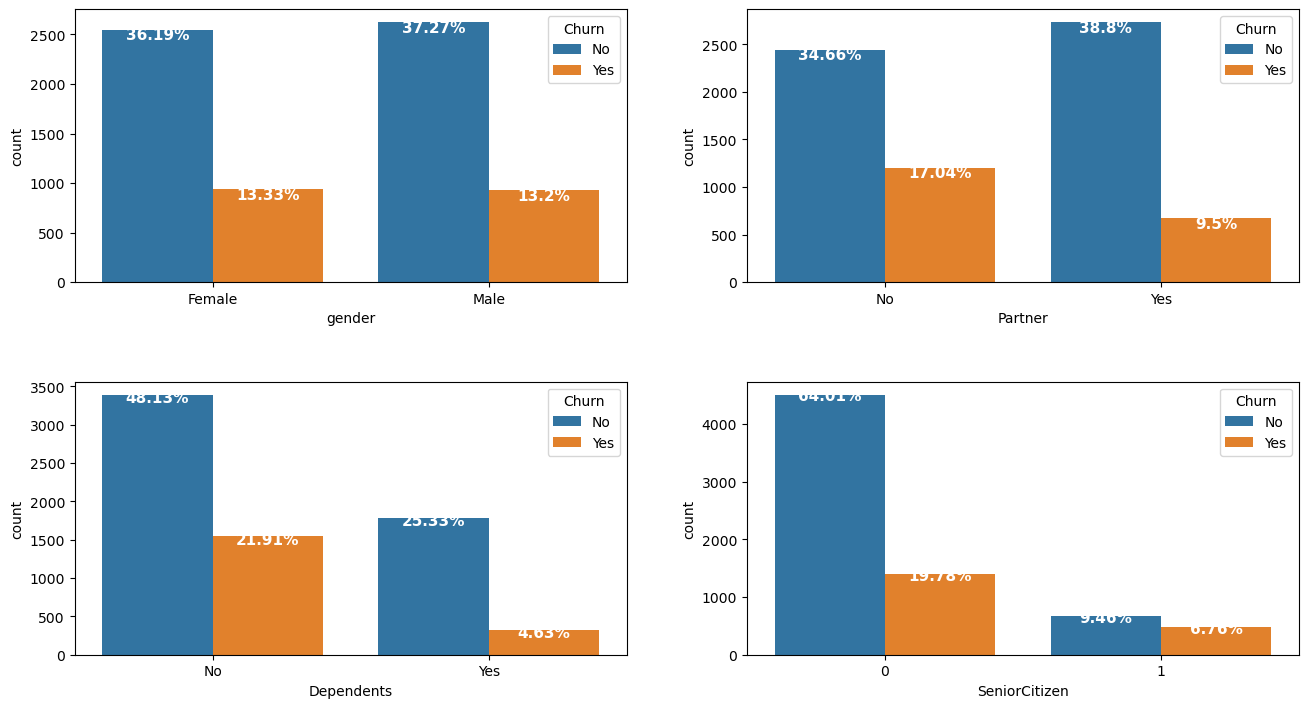

In [3]:
count_percentage_subplots(['gender', 'Partner', 'Dependents', 'SeniorCitizen'],2,2, "Churn", df, figsize_row = 14, figsize_col = 8 )

Observation:

1.The ratio of male and female customer are same

2.Customers without Partner or dependent churn more than those who have

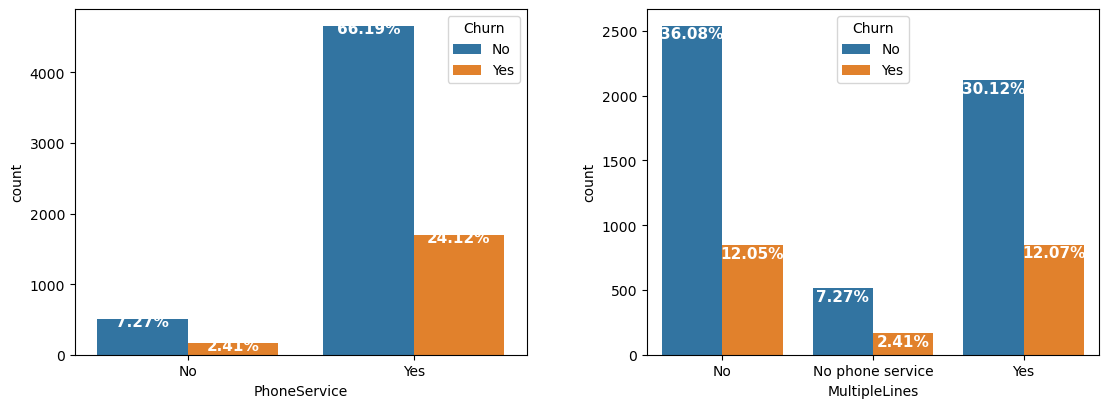

In [4]:
count_percentage_subplots(['PhoneService','MultipleLines'],1,2, "Churn", df, figsize_row = 12, figsize_col = 5 )

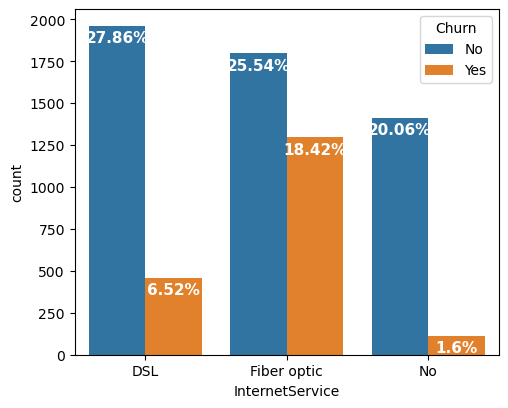

In [5]:
count_percentage_subplots(['InternetService'],1,1, "Churn", df, figsize_row = 6, figsize_col = 5 )

Observation:

1.Customer with "Fiber optic" have high churn rate


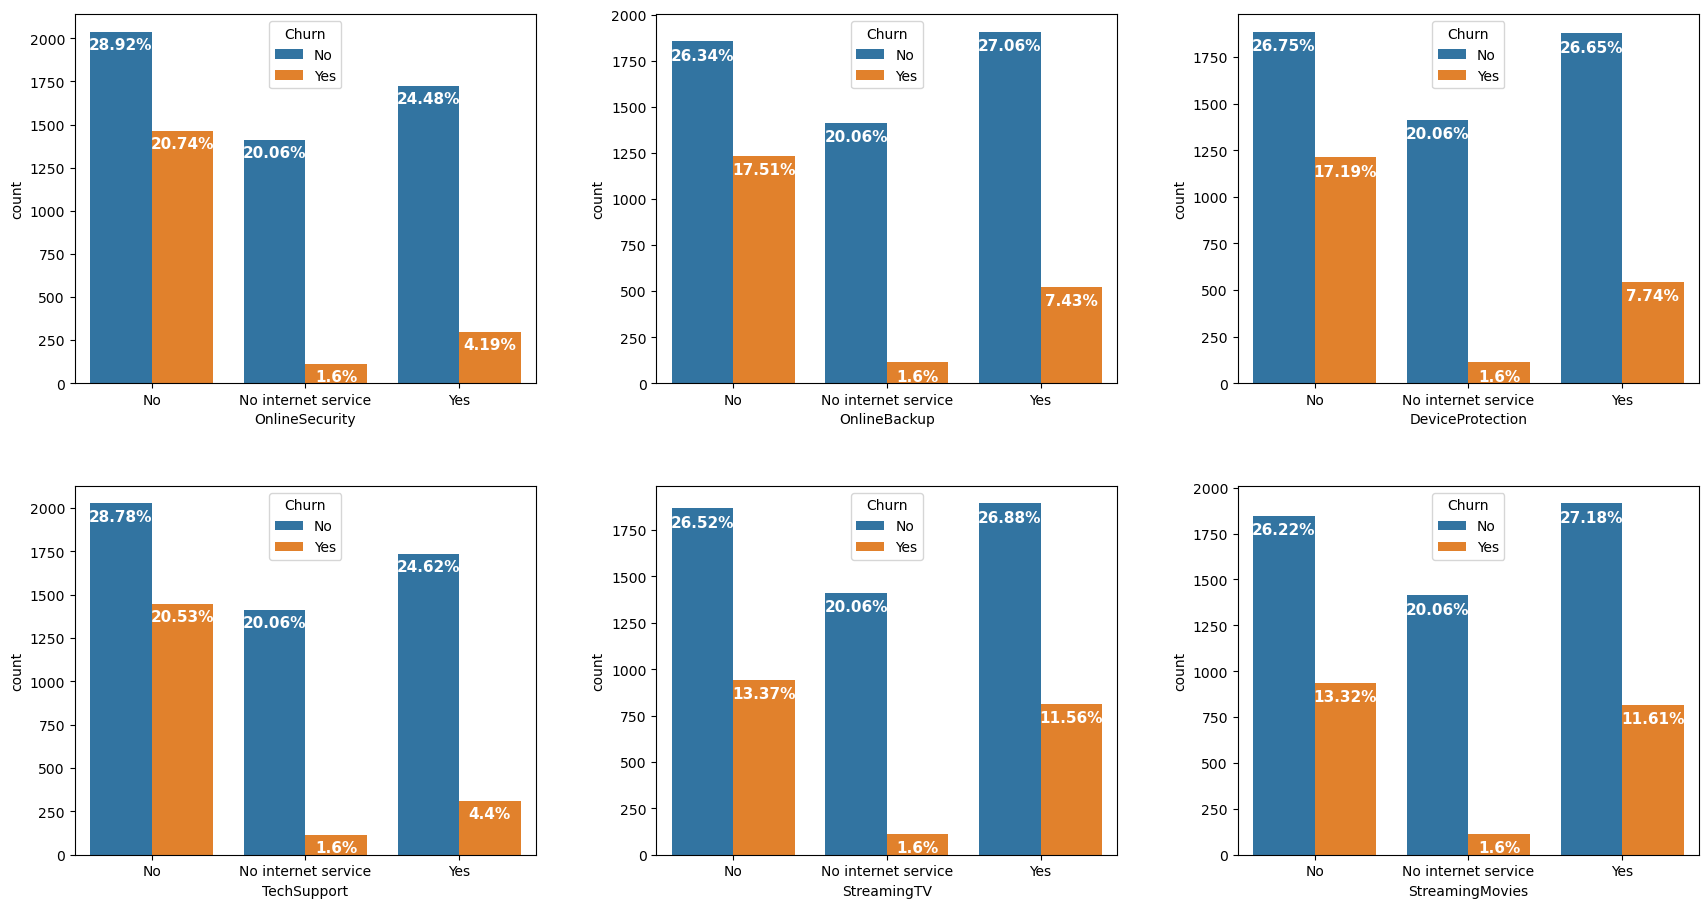

In [6]:

count_percentage_subplots(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
                         2,3, "Churn", df, figsize_row = 18, figsize_col = 10 )

Observation:

A Customer who has internet service but does not have any of the following are more likely to churn.

"OnlineBackup"

"DeviceProtection"

"Online Security"

"TechSupport"

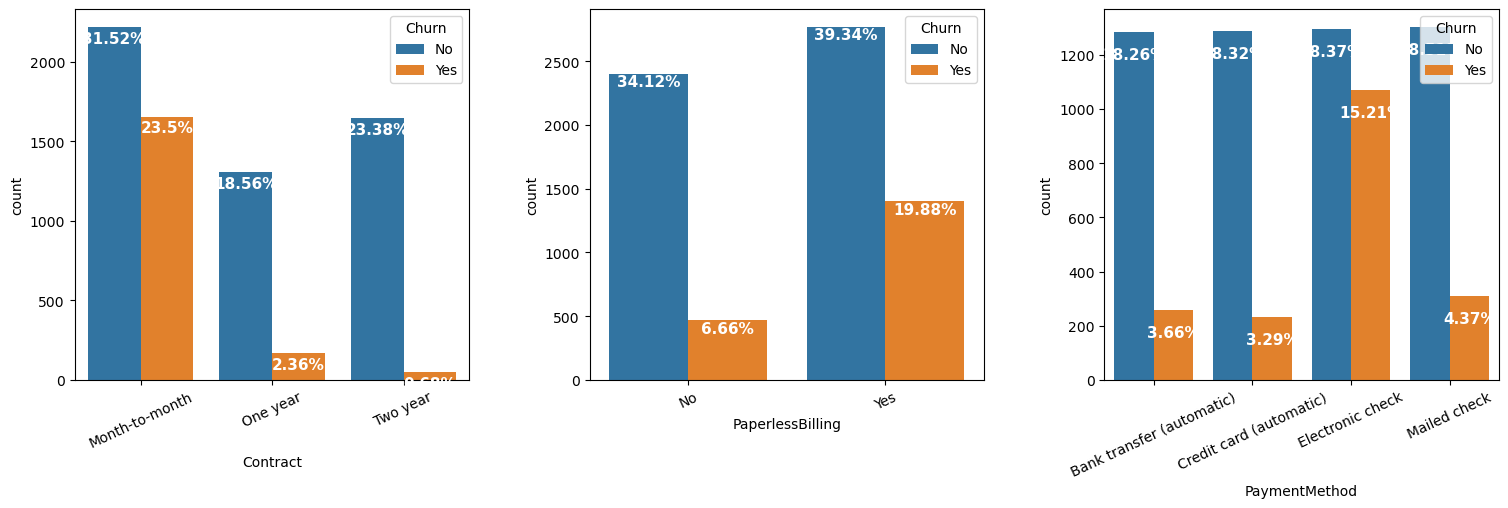

In [7]:
count_percentage_subplots(['Contract','PaperlessBilling','PaymentMethod'],1,3, "Churn", df, figsize_row =16 , figsize_col = 6 ,x_ticks_rotation = 25)

Observation:

1.Customers with month-to-month contract have a high churn rate with 23.54%

2.Check and cheque are examples of differences in spelling between British and American English. So Payment Method "Electronic check" and "Mailed check" are manual method of payements and "Credit card" and "Bank transfer" are automatic payments which does not involve the customer for each payments.

3.Customer paying with electronic check also have a high churn rate around 15.35%....this explain that why the churn of customers with paper billing is high.

# Data Preprocessing

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
for i in df.columns:
    print(i, ": ", df[i].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors = 'coerce')

for col in df.columns:
      if df[col].dtypes=="object":
        # Fit and transform data
        df[col]=label_encoder.fit_transform(df[col])
        # Convert to int64 explicitly
        df[col] = df[col].astype('int64')

for i in df.columns:
    print(i, ": ", df[i].unique())

customerID :  [5375 3962 2564 ... 3367 5934 2226]
gender :  [0 1]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  [0 1]
MultipleLines :  [1 0 2]
InternetService :  [0 1 2]
OnlineSecurity :  [0 2 1]
OnlineBackup :  [2 0 1]
DeviceProtection :  [0 2 1]
TechSupport :  [0 2 1]
StreamingTV :  [0 2 1]
StreamingMovies :  [0 2 1]
Contract :  [0 1 2]
PaperlessBilling :  [1 0]
PaymentMethod :  [2 3 0 1]
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [12]:
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Checking for missing data

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Simple imputer used to fill missing values

In [14]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df.iloc[:, 19:20])
df.iloc[:, 19:20] = imputer.transform(df.iloc[:, 19:20])

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.shape

(7043, 21)

# Splitting dataset into train and test data

In [17]:
#splitting train and test dataset
from sklearn.model_selection import train_test_split
x=df.iloc[:, 0:20]
y=df[['Churn']]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3,random_state=4)


In [18]:
print(df.shape, x_train.shape, x_test.shape)

(7043, 21) (4930, 20) (2113, 20)


# MODEL TRAINING

# 1)LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [21]:
model1 = LogisticRegression()
#defining hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)




GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Best LR Training Score: 0.8026369168356998
Test Performance: 0.7808802650260294
Confusion Matrix:


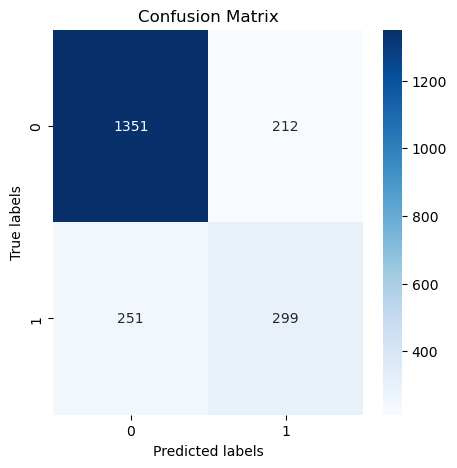

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1563
           1       0.59      0.54      0.56       550

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113

AUC: 0.8170988192869191


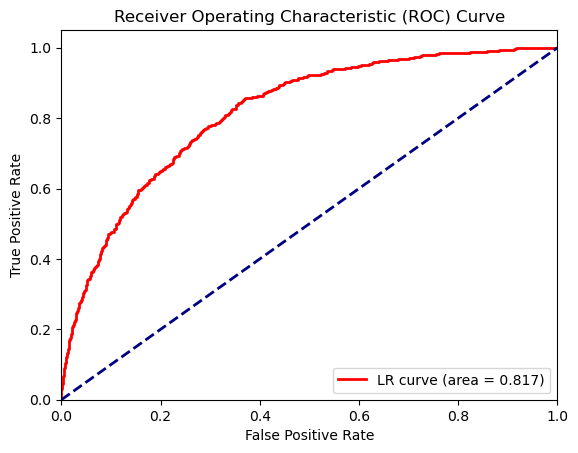

In [22]:
#best fitting
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

x_train_prediction = best_model.predict(x_train)
training_data_acc = accuracy_score(x_train_prediction, y_train)
print('Best LR Training Score:', training_data_acc)

x_test_prediction = best_model.predict(x_test)
test_data_acc = accuracy_score(y_test,x_test_prediction)
print('Test Performance:', test_data_acc)



# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, x_test_prediction)


# Visualizing confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#classification report
print("Classification report:\n")
print(classification_report(y_test, x_test_prediction))

lr_probs = best_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('AUC:', lr_auc)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot ROC curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='red', lw=2, label='LR curve (area = %0.3f)' % lr_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2)RANDOM FOREST 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
Best RF Training Score: 0.8101419722097581
Test Performance: 0.7865593942262187
Confusion Matrix:


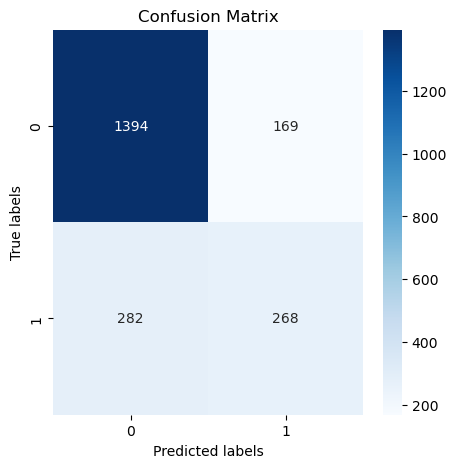

Classification Report:

RF AUROC:  0.8293328680276857
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1563
           1       0.61      0.49      0.54       550

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



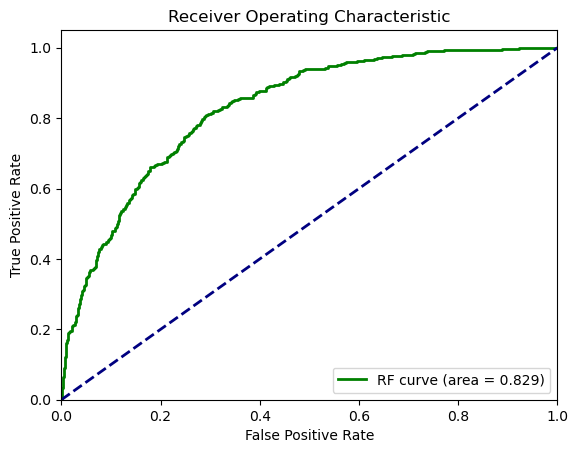

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score


# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=4, n_jobs=-1)

random_search.fit(x_train, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Generate predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Best RF Parameters:", random_search.best_params_)
print("Best RF Training Score:", random_search.best_score_)
print("Test Performance:", test_accuracy)

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Visualizing confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n")
y_test_pred_proba = best_rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
print("RF AUROC: ",roc_auc)
print(classification_report(y_test, y_test_pred)) 

# Plot ROC curve



plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='RF curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# KNN

Best KNN Training Score: 0.8255578093306288
Test Performance: 0.7610033128253668
Confusion Matrix:


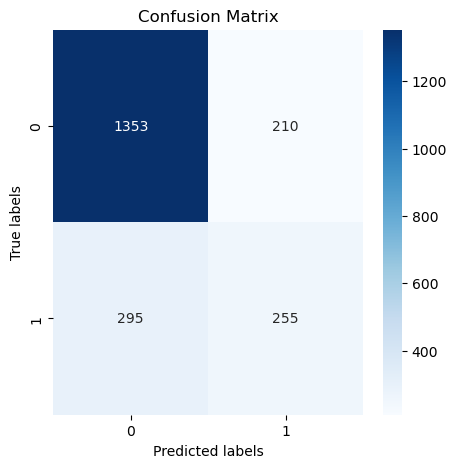

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1563
           1       0.55      0.46      0.50       550

    accuracy                           0.76      2113
   macro avg       0.68      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113

AUC: 0.7824120281509916


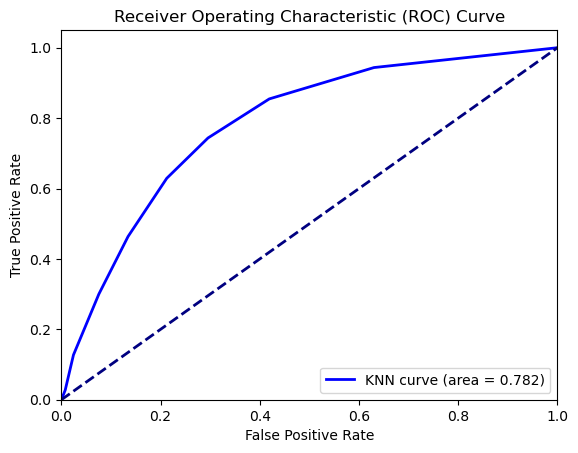

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the KNN model
model2 = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 9),
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Best fitting model
best_model = grid_search.best_estimator_
best_model.fit(x_train_scaled, y_train)

# Predictions on training data
x_train_prediction = best_model.predict(x_train_scaled)
training_data_acc = accuracy_score(y_train, x_train_prediction)
print('Best KNN Training Score:', training_data_acc)

# Predictions on test data
x_test_prediction = best_model.predict(x_test_scaled)
test_data_acc = accuracy_score(y_test, x_test_prediction)
print('Test Performance:', test_data_acc)



# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, x_test_prediction)

# Visualizing confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification report:\n")
print(classification_report(y_test, x_test_prediction))

# Calculating and plotting ROC curve
knn_probs = best_model.predict_proba(x_test_scaled)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
print('AUC:', knn_auc)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

plt.figure()
plt.plot(knn_fpr, knn_tpr, color="blue", lw=2, label='KNN curve (area = %0.3f)' % knn_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# SGB 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best SGB Training Score: 0.821501014198783
Test Performance: 0.7950780880265026
Classification Report:

SGB AUROC: 0.8321450590356542
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1563
           1       0.63      0.51      0.56       550

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

Confusion Matrix:


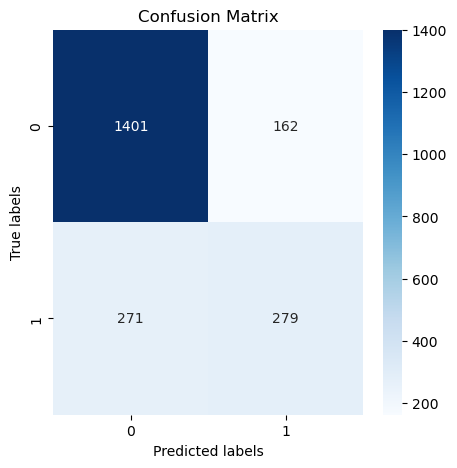

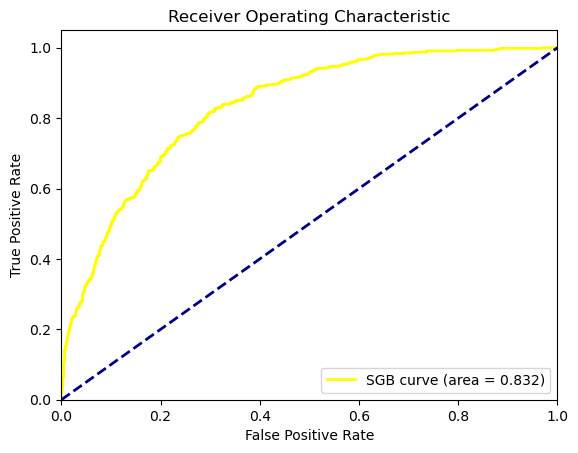

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Assume x_train, x_test, y_train, y_test are defined

# Define the Gradient Boosting classifier
model = GradientBoostingClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting individual base learners
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for splitting
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)

# Get the best estimator
best_gb = random_search.best_estimator_

# Generate predictions & Calculate accuracies
train_predictions = best_gb.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print('Best SGB Training Score:', train_accuracy)

test_predictions = best_gb.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Test Performance:', test_accuracy)

# Confusion matrix


# Print classification report
print("Classification Report:\n")
gb_probs = best_gb.predict_proba(x_test)
gb_probs = gb_probs[:, 1]
gb_auc = roc_auc_score(y_test, gb_probs)
print('SGB AUROC:', gb_auc)
print(classification_report(y_test, test_predictions))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, test_predictions)

# Visualizing confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUC


# Plot ROC curve
fpr1, tpr1, thresholds = roc_curve(y_test, gb_probs)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='SGB curve (area = %0.3f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# ROC curve for Classification models

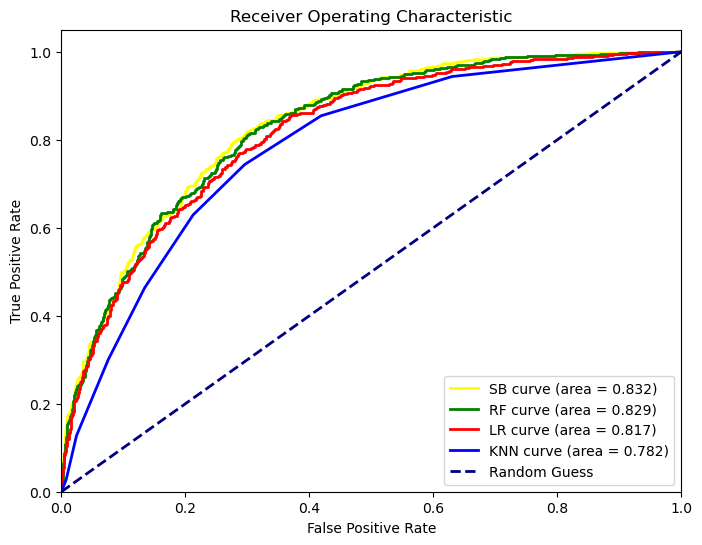

In [30]:
#comparing of all the models
plt.figure(figsize=(8, 6))

plt.plot(fpr1, tpr1, color='YELLOW', lw=2, label='SB curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr, tpr, color='GREEN', lw=2, label='RF curve (area = %0.3f)' % roc_auc)
plt.plot(lr_fpr, lr_tpr, color='RED', lw=2, label='LR curve (area = %0.3f)' % lr_auc)
plt.plot(knn_fpr, knn_tpr, color='BLUE', lw=2, label='KNN curve (area = %0.3f)' % knn_auc)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
